In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [9]:
df = pd.read_csv("data/prepared_data.csv")

# Support vector machines

In [10]:
X = df['cleaned_text']
y = df['LabelMapped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))), 
    ('svm', LinearSVC(C=1.0, max_iter=10000, random_state=42)) 
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

/opt/conda/envs/dspt/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [12]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7126840072916871


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.74      0.79      0.76     17993
           0       0.53      0.43      0.47     12600
           1       0.78      0.82      0.80     20424

    accuracy                           0.71     51017
   macro avg       0.68      0.68      0.68     51017
weighted avg       0.70      0.71      0.71     51017



           Predicted -1  Predicted 0  Predicted 1
Actual -1         14244         2353         1396
Actual 0           3760         5386         3454
Actual 1           1269         2426        16729


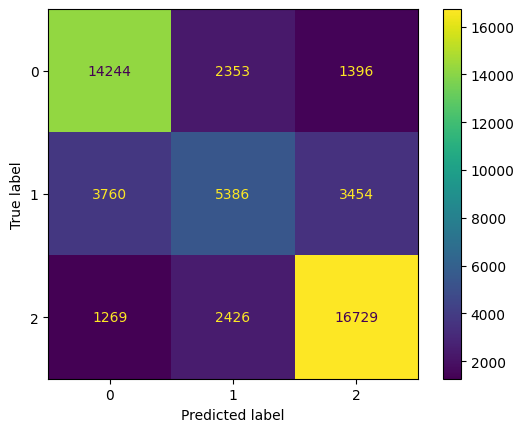

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual -1', 'Actual 0', 'Actual 1'], columns=['Predicted -1', 'Predicted 0', 'Predicted 1'])
print(cm_df)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()